# Numerical comparison plots

Figure to summarize numerical comparison results. See [this notebook](https://gaow.github.io/mvarbvs/analysis/20190218_MNM_Benchmark.html) for its input data.

I plan to make 3 types of comparisons: oracle, mismatched and default. In particular I'll put together results from all scenarios (averaged), singleton scenario and shared (with heterogenous effect size), in 3 panels, for 6 quantities:

- size
- purity
- coverage
- power
- per condition FDR
- per condition power

In [1]:
%cd ~/GIT/github/mnm-twas/dsc

/home/gaow/GIT/github/mnm-twas/dsc

## Load and organize data

In [2]:
res = readRDS('../data/finemap_output.query_result.rds')
res = res[,c(2,4,5,6,7,8,9,10,11,12,13,14,15)]
colnames(res) = c('pattern', 'method', 'total', 'valid', 'size', 'purity', 'top_hit', 'total_true', 'total_true_included', 'overlap', 'false_positive_cross_cond', 'false_negative_cross_cond', 'true_positive_cross_cond')

In [3]:
oracle = "M&M oracle"
mismatch = "M&M mismatch"
default = "M&M default mixture"

## Purity

In [4]:
purity = aggregate(purity~pattern + method, res, mean)
purity$scenario = rep(NA, nrow(purity))
purity$scenario[which(purity$method == purity$pattern & purity$method != 'mixture_1')] = oracle
purity$scenario[which(purity$method != purity$pattern & purity$method != 'mixture_1')] = mismatch
purity$scenario[which(purity$method == "mixture_1")] = default
purity = purity[which(!is.na(purity$scenario)),]
purity_median = aggregate(purity~scenario, purity, median)
purity_median

scenario,purity
M&M default mixture,0.9847903
M&M mismatch,0.9360424
M&M oracle,0.9837503


In [5]:
purity_singleton = purity[which(purity$pattern == 'singleton'),]
purity_median_singleton = aggregate(purity~scenario, purity_singleton, median)
purity_median_singleton

scenario,purity
M&M default mixture,0.8568686
M&M mismatch,0.8554835
M&M oracle,0.8699070


In [6]:
purity_het = purity[which(purity$pattern == 'low_het'),]
purity_median_het = aggregate(purity~scenario, purity_het, median)
purity_median_het

scenario,purity
M&M default mixture,0.9851506
M&M mismatch,0.9835865
M&M oracle,0.9854448


## Size

In [7]:
size = aggregate(size~pattern + method, res, mean)
size$scenario = rep(NA, nrow(size))
size$scenario[which(size$method == size$pattern & size$method != 'mixture_1')] = oracle
size$scenario[which(size$method != size$pattern & size$method != 'mixture_1')] = mismatch
size$scenario[which(size$method == "mixture_1")] = default
size = size[which(!is.na(size$scenario)),]
size_median = aggregate(size~scenario, size, median)
size_singleton = size[which(size$pattern == 'singleton'),]
size_median_singleton = aggregate(size~scenario, size_singleton, median)
size_het = size[which(size$pattern == 'low_het'),]
size_median_het = aggregate(size~scenario, size_het, median)

In [8]:
size_median

scenario,size
M&M default mixture,9.771
M&M mismatch,11.613
M&M oracle,9.782


In [9]:
size_median_singleton

scenario,size
M&M default mixture,17.714
M&M mismatch,17.291
M&M oracle,18.366


In [10]:
size_median_het

scenario,size
M&M default mixture,8.679
M&M mismatch,8.797
M&M oracle,8.624


## Coverage


In [11]:
valid = aggregate(valid ~ pattern + method, res, sum)
total = aggregate(total ~ pattern + method, res, sum)
fdr = merge(valid, total, by = c("pattern", "method"))
fdr$fdr = (fdr$total - fdr$valid)/fdr$total

In [12]:
fdr$scenario = rep(NA, nrow(fdr))
fdr$scenario[which(fdr$method == fdr$pattern & fdr$method != 'mixture_1')] = oracle
fdr$scenario[which(fdr$method != fdr$pattern & fdr$method != 'mixture_1')] = mismatch
fdr$scenario[which(fdr$method == "mixture_1")] = default
fdr = fdr[which(!is.na(fdr$scenario)),]
fdr_mean = aggregate(fdr~scenario, fdr, mean)
fdr_singleton = fdr[which(fdr$pattern == 'singleton'),]
fdr_mean_singleton = aggregate(fdr~scenario, fdr_singleton, mean)
fdr_het = fdr[which(fdr$pattern == 'low_het'),]
fdr_mean_het = aggregate(fdr~scenario, fdr_het, mean)

In [13]:
fdr_mean

scenario,fdr
M&M default mixture,0.05729344
M&M mismatch,0.07227381
M&M oracle,0.07222584


In [14]:
fdr_mean_singleton

scenario,fdr
M&M default mixture,0.05464481
M&M mismatch,0.08773907
M&M oracle,0.05663717


In [15]:
fdr_mean_het

scenario,fdr
M&M default mixture,0.05804111
M&M mismatch,0.06680457
M&M oracle,0.07048984


## Power

In [16]:
total_true_included = aggregate(total_true_included ~ pattern + method, res, sum)
total_true = aggregate(total_true ~ pattern + method, res, sum)
overlap = aggregate(overlap ~ pattern + method, res, mean)
power = merge(total_true_included, total_true, by = c("pattern", "method"))
power = merge(power, overlap,  by = c("pattern", "method"))
power$power = power$total_true_included/power$total_true

In [17]:
power$scenario = rep(NA, nrow(power))
power$scenario[which(power$method == power$pattern & power$method != 'mixture_1')] = oracle
power$scenario[which(power$method != power$pattern & power$method != 'mixture_1')] = mismatch
power$scenario[which(power$method == "mixture_1")] = default
power = power[which(!is.na(power$scenario)),]
power_mean = aggregate(power~scenario, power, mean)
power_singleton = power[which(power$pattern == 'singleton'),]
power_mean_singleton = aggregate(power~scenario, power_singleton, mean)
power_het = power[which(power$pattern == 'low_het'),]
power_mean_het = aggregate(power~scenario, power_het, mean)

In [18]:
power_mean

scenario,power
M&M default mixture,0.8623861
M&M mismatch,0.8328877
M&M oracle,0.8769862


In [19]:
power_mean_singleton

scenario,power
M&M default mixture,0.6433824
M&M mismatch,0.5791667
M&M oracle,0.6629902


In [20]:
power_mean_het

scenario,power
M&M default mixture,0.9183197
M&M mismatch,0.8991832
M&M oracle,0.9148191


## FDR per condition

In [21]:
tp = aggregate(true_positive_cross_cond ~ pattern + method, res, sum)
fp = aggregate(false_positive_cross_cond ~ pattern + method, res, sum)
fdr_cond = merge(tp, fp, by = c("pattern", "method"))
fdr_cond$fdr_cond = fdr_cond$false_positive_cross_cond/(fdr_cond$true_positive_cross_cond + fdr_cond$false_positive_cross_cond)
fdr_cond = fdr_cond[order(fdr_cond$method),]

In [22]:
fdr_cond$scenario = rep(NA, nrow(fdr_cond))
fdr_cond$scenario[which(fdr_cond$method == fdr_cond$pattern & fdr_cond$method != 'mixture_1')] = oracle
fdr_cond$scenario[which(fdr_cond$method != fdr_cond$pattern & fdr_cond$method != 'mixture_1')] = mismatch
fdr_cond$scenario[which(fdr_cond$method == "mixture_1")] = default
fdr_cond = fdr_cond[which(!is.na(fdr_cond$scenario)),]
fdr_cond_mean = aggregate(fdr_cond~scenario, fdr_cond, mean)
fdr_cond_singleton = fdr_cond[which(fdr_cond$pattern == 'singleton'),]
fdr_cond_mean_singleton = aggregate(fdr_cond~scenario, fdr_cond_singleton, mean)
fdr_cond_het = fdr_cond[which(fdr_cond$pattern == 'low_het'),]
fdr_cond_mean_het = aggregate(fdr_cond~scenario, fdr_cond_het, mean)

In [23]:
fdr_cond_mean

scenario,fdr_cond
M&M default mixture,0.05656631
M&M mismatch,0.16852276
M&M oracle,0.06709568


In [24]:
fdr_cond_mean_singleton

scenario,fdr_cond
M&M default mixture,0.06099815
M&M mismatch,0.73187766
M&M oracle,0.05605787


In [25]:
fdr_cond_mean_het

scenario,fdr_cond
M&M default mixture,0.05258009
M&M mismatch,0.06053400
M&M oracle,0.06042074


## Power per condition

In [26]:
tp = aggregate(true_positive_cross_cond ~ pattern + method, res, sum)
fn = aggregate(false_negative_cross_cond ~ pattern + method, res, sum)
power_cond = merge(tp, fn, by = c("pattern", "method"))
power_cond$power_cond = power_cond$true_positive_cross_cond/(power_cond$true_positive_cross_cond + power_cond$false_negative_cross_cond)

In [27]:
power_cond$scenario = rep(NA, nrow(power_cond))
power_cond$scenario[which(power_cond$method == power_cond$pattern & power_cond$method != 'mixture_1')] = oracle
power_cond$scenario[which(power_cond$method != power_cond$pattern & power_cond$method != 'mixture_1')] = mismatch
power_cond$scenario[which(power_cond$method == "mixture_1")] = default
power_cond = power_cond[which(!is.na(power_cond$scenario)),]
power_cond_mean = aggregate(power_cond~scenario, power_cond, mean)
power_cond_singleton = power_cond[which(power_cond$pattern == 'singleton'),]
power_cond_mean_singleton = aggregate(power_cond~scenario, power_cond_singleton, mean)
power_cond_het = power_cond[which(power_cond$pattern == 'low_het'),]
power_cond_mean_het = aggregate(power_cond~scenario, power_cond_het, mean)

In [28]:
power_cond_mean

scenario,power_cond
M&M default mixture,0.9850758
M&M mismatch,0.8242107
M&M oracle,0.9680900


In [29]:
power_cond_mean_singleton

scenario,power_cond
M&M default mixture,0.9769231
M&M mismatch,0.9368670
M&M oracle,0.9775281


In [30]:
power_cond_mean_het

scenario,power_cond
M&M default mixture,0.9882653
M&M mismatch,0.8107187
M&M oracle,0.9753682


Notice the per condition power looks a lot higher than the other analysis, because most powerful tests are for shared effects, which will get counted $R$ times for each signal in per condition analysis, but only are counted one time in overall assessment. Therefore singleton scenarios are relatively more abundant in overall assessment, leading to less powerful tests.

In [31]:
ls()

[1] "default"                   "fdr"                      
 [3] "fdr_cond"                  "fdr_cond_het"             
 [5] "fdr_cond_mean"             "fdr_cond_mean_het"        
 [7] "fdr_cond_mean_singleton"   "fdr_cond_singleton"       
 [9] "fdr_het"                   "fdr_mean"                 
[11] "fdr_mean_het"              "fdr_mean_singleton"       
[13] "fdr_singleton"             "fn"                       
[15] "fp"                        "mismatch"                 
[17] "oracle"                    "overlap"                  
[19] "power"                     "power_cond"               
[21] "power_cond_het"            "power_cond_mean"          
[23] "power_cond_mean_het"       "power_cond_mean_singleton"
[25] "power_cond_singleton"      "power_het"                
[27] "power_mean"                "power_mean_het"           
[29] "power_mean_singleton"      "power_singleton"          
[31] "purity"                    "purity_het"               
[33] "purity_median"             "purity_median_het"        
[35] "purity_median_singleton"   "purity_singleton"         
[37] "res"                       "size"                     
[39] "size_het"                  "size_median"              
[41] "size_median_het"           "size_median_singleton"    
[43] "size_singleton"            "total"                    
[45] "total_true"                "total_true_included"      
[47] "tp"                        "valid"

In [32]:
output = list(fdr_cond=fdr_cond_mean, fdr_cond_het=fdr_cond_mean_het, fdr_cond_singleton=fdr_cond_mean_singleton,
             fdr=fdr_mean, fdr_het=fdr_mean_het, fdr_singleton=fdr_mean_singleton, 
             power_cond=power_cond_mean, power_cond_het=power_cond_mean_het, power_singleton=power_mean_singleton,
             power=power_mean, power_het=power_mean_het, power_singleton=power_mean_singleton,
             purity=purity_median, purity_het=purity_median_het, purity_singleton=purity_median_singleton,
             size=size_median, size_het=size_median_het, size_singleton=size_median_singleton)
saveRDS(output, '../data/finemap_output.summarized_result.rds')

## Make plot

In [33]:
res = readRDS('../data/finemap_output.summarized_result.rds')

In [98]:
get_table = function(output, key) {
    dat = Reduce(function(x, y) merge(x, y, all=TRUE), list(output[[key]], output[[paste0(key,'_het')]], output[[paste0(key,'_singleton')]]))
    dat = cbind(dat, c('overall', 'shared', 'singleton'))
    dat = cbind(dat, c(4,5,6,7,8,9,1,2,3))
    dat = cbind(dat, c(1,2,3,1,2,3,1,2,3))
    names(dat) = c('method', 'fdr', 'scenario', 'o1', 'o2')
    return(dat)
}

In [99]:
RColorBrewer::brewer.pal(n = 8, name = "Set1")

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"
[8] "#F781BF"

## Size

In [100]:
fdr_cond = get_table(output, 'fdr_cond')

In [101]:
pdf('test.pdf', width=3.5, height=5)
lattice::dotplot(fdr ~ reorder(method, o1) | reorder(scenario, o2), data=fdr_cond,  
        auto.key=list(columns=2), scale=list(alternating=1, x = list(rot = 45)), 
        layout = c(3,1), angle = 45, col='#E41A1C',
        xlab="Method", ylab = "Condition specific FDR (lfsr<0.05)")
dev.off()

png 
  2

> test.pdf (4.8 KiB):

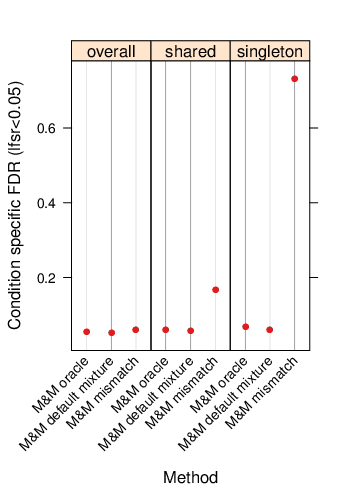

In [102]:
%preview test.pdf -s png --dpi 100